# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Zulqhi Fahri Muda
- **Email:** professorrob01@gmail.com
- **ID Dicoding:** fahrimuda01

## Menentukan Pertanyaan Bisnis

- Bagaimana tren produk yang diminati customer berdasarkan kategori produk?
- Apa saja produk terlaris dan sedikit terjual ?
- Berapa total pendapatan 3 produk terlari pertahun?
- Bagaimana tingkat kepuasan customer terhadap produk yang dijual?

## Import Semua Packages/Library yang Digunakan

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.ticker as ticker

## Data Wrangling

### Gathering Data

In [110]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [111]:
order_item_df = pd.read_csv('data/order_items_dataset.csv')
order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [112]:
order_payments_df = pd.read_csv('data/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [113]:
order_reviews_df = pd.read_csv('data/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [114]:
order_df = pd.read_csv('data/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [115]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [116]:
product_category_df = pd.read_csv('data/product_category_name_translation.csv')
product_category_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [117]:
seller_df = pd.read_csv('data/sellers_dataset.csv')
seller_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [118]:
geolocation_df = pd.read_csv('data/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Description Data Consumer**

In [119]:
print('\n', customers_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

 None


**Decription Data Order**

In [120]:
print(order_df.info(), end='\n\n')
print(order_item_df.info(), end='\n\n')
print(order_payments_df.info(), end='\n\n')
print(order_reviews_df.info(), end='\n\n')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  o

**Decription Data Product**

In [121]:
print(products_df.info(), end='\n\n')
print(product_category_df.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         ----------

**Other Description**

In [122]:
print(seller_df.info(), end='\n\n')
print(geolocation_df.info(), end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  o


**customers_df**
- DataFrame ini berisi informasi tentang pelanggan.
- Terdapat 99,441 baris dan 5 kolom.
- Kolom-kolomnya adalah:
   - `customer_id`: ID unik untuk setiap pelanggan.
   - `customer_unique_id`: ID unik yang mengidentifikasi pelanggan secara unik.
   - `customer_zip_code_prefix`: Kode pos pelanggan.
   - `customer_city`: Kota tempat tinggal pelanggan.
   - `customer_state`: Negara bagian tempat tinggal pelanggan.
- Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

**geolocation_df**
- DataFrame ini berisi informasi geolokasi berdasarkan kode pos.
- Terdapat 1,000,163 baris dan 5 kolom.
- Kolom-kolomnya adalah:
   - `geolocation_zip_code_prefix`: Kode pos.
   - `geolocation_lat`: Latitude (garis lintang).
   - `geolocation_lng`: Longitude (garis bujur).
   - `geolocation_city`: Kota.
   - `geolocation_state`: Negara bagian.
- Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

**order_df**
- DataFrame ini berisi informasi tentang pesanan.
- Terdapat 99,441 baris dan 8 kolom.
- Kolom-kolomnya adalah:
   - `order_id`: ID unik untuk setiap pesanan.
   - `customer_id`: ID pelanggan yang melakukan pesanan.
   - `order_status`: Status pesanan.
   - `order_purchase_timestamp`: Waktu pembelian pesanan.
   - `order_approved_at`: Waktu persetujuan pesanan.
   - `order_delivered_carrier_date`: Tanggal pengiriman oleh kurir.
   - `order_delivered_customer_date`: Tanggal pesanan diterima oleh pelanggan.
   - `order_estimated_delivery_date`: Tanggal estimasi pengiriman.
- Terdapat beberapa nilai yang hilang di kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`.

**order_item_df**
- DataFrame ini berisi informasi tentang item dalam pesanan.
- Terdapat 112,650 baris dan 7 kolom.
- Kolom-kolomnya adalah:
   - `order_id`: ID unik untuk setiap pesanan.
   - `order_item_id`: ID unik untuk setiap item dalam pesanan.
   - `product_id`: ID produk.
   - `seller_id`: ID penjual.
   - `shipping_limit_date`: Tanggal batas pengiriman.
   - `price`: Harga produk.
   - `freight_value`: Biaya pengiriman.
- Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

**order_payments_df**
- DataFrame ini berisi informasi tentang pembayaran pesanan.
- Terdapat 103,886 baris dan 5 kolom.
- Kolom-kolomnya adalah:
   - `order_id`: ID unik untuk setiap pesanan.
   - `payment_sequential`: Urutan pembayaran.
   - `payment_type`: Jenis pembayaran.
   - `payment_installments`: Jumlah cicilan pembayaran.
   - `payment_value`: Nilai pembayaran.
- Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

**order_reviews_df**
- DataFrame ini berisi informasi tentang ulasan pesanan.
- Terdapat 99,224 baris dan 7 kolom.
- Kolom-kolomnya adalah:
   - `review_id`: ID unik untuk setiap ulasan.
   - `order_id`: ID pesanan yang diulas.
   - `review_score`: Skor ulasan.
   - `review_comment_title`: Judul komentar ulasan.
   - `review_comment_message`: Pesan komentar ulasan.
   - `review_creation_date`: Tanggal pembuatan ulasan.
   - `review_answer_timestamp`: Tanggal jawaban ulasan.
- Terdapat beberapa nilai yang hilang di kolom `review_comment_title` dan `review_comment_message`.

**product_category_df**
- DataFrame ini berisi informasi tentang kategori produk.
- Terdapat 71 baris dan 2 kolom.
- Kolom-kolomnya adalah:
   - `product_category_name`: Nama kategori produk dalam bahasa asli.
   - `product_category_name_english`: Nama kategori produk dalam bahasa Inggris.
- Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

**products_df**
- DataFrame ini berisi informasi tentang produk.
- Terdapat 32,951 baris dan 9 kolom.
- Kolom-kolomnya adalah:
   - `product_id`: ID unik untuk setiap produk.
   - `product_category_name`: Nama kategori produk.
   - `product_name_lenght`: Panjang nama produk.
   - `product_description_lenght`: Panjang deskripsi produk.
   - `product_photos_qty`: Jumlah foto produk.
   - `product_weight_g`: Berat produk dalam gram.
   - `product_length_cm`: Panjang produk dalam cm.
   - `product_height_cm`: Tinggi produk dalam cm.
   - `product_width_cm`: Lebar produk dalam cm.
- Terdapat beberapa nilai yang hilang di kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`.

**seller_df**
- DataFrame ini berisi informasi tentang penjual.
- Terdapat 3,095 baris dan 4 kolom.
- Kolom-kolomnya adalah:
   - `seller_id`: ID unik untuk setiap penjual.
   - `seller_zip_code_prefix`: Kode pos penjual.
   - `seller_city`: Kota penjual.
   - `seller_state`: Negara bagian penjual.
- Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

**Insight**
- Data pelanggan (`customers_df`) berisi informasi tentang pelanggan dengan 99,441 baris dan 5 kolom.
- Data geolokasi (`geolocation_df`) berisi informasi geolokasi berdasarkan kode pos dengan 1,000,163 baris dan 5 kolom.
- Data pesanan (`order_df`) berisi informasi tentang pesanan dengan 99,441 baris dan 8 kolom.
- Data item pesanan (`order_item_df`) berisi informasi tentang item dalam pesanan dengan 112,650 baris dan 7 kolom.
- Data pembayaran pesanan (`order_payments_df`) berisi informasi tentang pembayaran pesanan dengan 103,886 baris dan 5 kolom.
- Data ulasan pesanan (`order_reviews_df`) berisi informasi tentang ulasan pesanan dengan 99,224 baris dan 7 kolom.
- Data produk (`products_df`) berisi informasi tentang produk dengan 32,951 baris dan 9 kolom.
- Data kategori produk (`product_category_df`) berisi informasi tentang kategori produk dengan 71 baris dan 2 kolom.
- Data penjual (`seller_df`) berisi informasi tentang penjual dengan 3,095 baris dan 4 kolom.

### Assesing Data

**Mengecek Data Null ada atau tidak**

In [123]:
print('Info banyak data null pada customers: \n', customers_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada order items: \n', order_item_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada order payments: \n', order_payments_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada order reviews: \n', order_reviews_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada order: \n', order_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada products: \n', products_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada product category: \n', product_category_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada seller: \n', seller_df.isnull().sum(), end='\n\n')
print('Info banyak data null pada geolocation: \n', geolocation_df.isnull().sum(), end='\n\n')

Info banyak data null pada customers: 
 customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Info banyak data null pada order items: 
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Info banyak data null pada order payments: 
 order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Info banyak data null pada order reviews: 
 review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Info banyak data null pada order: 
 order_id                            0
customer_id  

**Penjelasan Hasil Pengecekan Data Null**

Berdasarkan hasil pengecekan data null pada berbagai DataFrame, berikut adalah penjelasan rinci mengenai jumlah data yang hilang (missing values) di setiap DataFrame:

1. **customers_df**
   - Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

2. **order_item_df**
   - Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

3. **order_payments_df**
   - Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

4. **order_reviews_df**
   - Kolom `review_comment_title` memiliki 87,656 nilai yang hilang.
   - Kolom `review_comment_message` memiliki 58,247 nilai yang hilang.

5. **order_df**
   - Kolom `order_approved_at` memiliki 160 nilai yang hilang.
   - Kolom `order_delivered_carrier_date` memiliki 1,783 nilai yang hilang.
   - Kolom `order_delivered_customer_date` memiliki 2,965 nilai yang hilang.

6. **products_df**
   - Kolom `product_category_name` memiliki 610 nilai yang hilang.
   - Kolom `product_name_lenght` memiliki 610 nilai yang hilang.
   - Kolom `product_description_lenght` memiliki 610 nilai yang hilang.
   - Kolom `product_photos_qty` memiliki 610 nilai yang hilang.
   - Kolom `product_weight_g` memiliki 2 nilai yang hilang.
   - Kolom `product_length_cm` memiliki 2 nilai yang hilang.
   - Kolom `product_height_cm` memiliki 2 nilai yang hilang.
   - Kolom `product_width_cm` memiliki 2 nilai yang hilang.

7. **product_category_df**
   - Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

8. **seller_df**
   - Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

9. **geolocation_df**
   - Tidak ada nilai yang hilang (missing values) di dalam DataFrame ini.

Secara keseluruhan, beberapa DataFrame memiliki nilai yang hilang pada kolom tertentu, terutama pada `order_reviews_df`, `order_df`, dan `products_df`. Penanganan missing values ini perlu dilakukan agar analisis data dapat berjalan dengan baik dan menghasilkan insight yang akurat.

**Mengecek Data Duplikat**

In [124]:
print('Info data duplikat customers:', customers_df.duplicated().sum())
print('Info data duplikat order:', order_df.duplicated().sum())
print('Info data duplikat order items:', order_item_df.duplicated().sum())
print('Info data duplikat order payments:', order_payments_df.duplicated().sum())
print('Info data duplikat order reviews:', order_reviews_df.duplicated().sum())
print('Info data duplikat products:', products_df.duplicated().sum())
print('Info data duplikat product category:', product_category_df.duplicated().sum())
print('Info data duplikat seller:', seller_df.duplicated().sum())
print('Info data duplikat geolocation:', geolocation_df.duplicated().sum())

Info data duplikat customers: 0
Info data duplikat order: 0
Info data duplikat order items: 0
Info data duplikat order payments: 0
Info data duplikat order reviews: 0
Info data duplikat products: 0
Info data duplikat product category: 0
Info data duplikat seller: 0
Info data duplikat geolocation: 261831


**Penjelasan Hasil Pengecekan Data Duplikat**

Berdasarkan hasil pengecekan data duplikat pada berbagai DataFrame, berikut adalah penjelasan rinci mengenai jumlah data yang duplikat di setiap DataFrame:

1. **customers_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

2. **order_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

3. **order_item_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

4. **order_payments_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

5. **order_reviews_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

6. **products_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

7. **product_category_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

8. **seller_df**
   - Tidak ada data duplikat di dalam DataFrame ini.

9. **geolocation_df**
   - Terdapat 261,831 data duplikat di dalam DataFrame ini.


**Insight:**
- Data pelanggan (`customers_df`) tidak memiliki nilai yang hilang dan tidak ada data duplikat.
- Data geolokasi (`geolocation_df`) tidak memiliki nilai yang hilang tetapi memiliki 261,831 data duplikat.
- Data pesanan (`order_df`) memiliki beberapa nilai yang hilang pada kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date`, tetapi tidak ada data duplikat.
- Data item pesanan (`order_item_df`) tidak memiliki nilai yang hilang dan tidak ada data duplikat.
- Data pembayaran pesanan (`order_payments_df`) tidak memiliki nilai yang hilang dan tidak ada data duplikat.
- Data ulasan pesanan (`order_reviews_df`) memiliki banyak nilai yang hilang pada kolom `review_comment_title` dan `review_comment_message`, tetapi tidak ada data duplikat.
- Data produk (`products_df`) memiliki beberapa nilai yang hilang pada kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm`, tetapi tidak ada data duplikat.
- Data kategori produk (`product_category_df`) tidak memiliki nilai yang hilang dan tidak ada data duplikat.
- Data penjual (`seller_df`) tidak memiliki nilai yang hilang dan tidak ada data duplikat.


### Cleaning Data

**Menganalisis Kekosongan Data**

In [125]:
# menampilkan data yang memiliki kekosongan
order_df[order_df.isnull().any(axis=1)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [126]:
order_reviews_df[order_reviews_df.isnull().any(axis=1)]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [127]:
products_df[products_df.isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


**Solusi untuk Mengatasi Data yang Null**

Berdasarkan hasil pengecekan data frame di atas, berikut adalah beberapa solusi yang dapat diterapkan untuk mengatasi data yang null:

1. **order_df**
   - Kolom `order_approved_at`, `order_delivered_carrier_date`, dan `order_delivered_customer_date` memiliki nilai yang hilang. Dimana nilai hilang / null itu sesuai pada tempatnya yang mana akan kosong sebagian jika statusnya invoiced, processing, canceled, dan unvailable
   - Solusi:
     - Tidak perlu di hapus atau diisi karena sudah sesuai
   
2. **order_reviews_df**
   - Kolom `review_comment_title` dan `review_comment_message` memiliki nilai yang hilang.
   - Solusi:
     - Kolom `review_comment_title` dan `review_comment_message` dapat diisi dengan string kosong atau nilai default seperti "No Comment" jika data tersebut tidak terlalu penting untuk analisis.
     - Jika data tersebut penting, dapat dilakukan analisis lebih lanjut untuk menentukan apakah data tersebut perlu dihapus atau diisi dengan nilai lain.

3. **products_df**
   - Kolom `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`, `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` memiliki nilai yang hilang.
   - Solusi:
     - Kolom `product_category_name` dapat diisi dengan kategori "Unknown" atau kategori yang paling sering muncul.
     - Kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` dapat diisi dengan nilai rata-rata atau median dari kolom tersebut.
     - Kolom `product_weight_g`, `product_length_cm`, `product_height_cm`, dan `product_width_cm` dapat diisi dengan nilai rata-rata atau median dari kolom tersebut.

Secara umum, solusi untuk mengatasi data yang null dapat dilakukan dengan beberapa pendekatan seperti:
- Mengisi nilai yang hilang dengan nilai rata-rata, median, atau modus dari kolom tersebut.
- Mengisi nilai yang hilang dengan nilai default atau kategori "Unknown".
- Menghapus baris atau kolom yang memiliki nilai yang hilang jika jumlahnya tidak signifikan dan tidak mempengaruhi analisis secara keseluruhan.

Penting untuk melakukan analisis lebih lanjut untuk menentukan pendekatan yang paling sesuai berdasarkan konteks dan tujuan analisis data.

**Melakukan casting dari date ke datetime pada Order**

In [128]:
# convert semua data yang berupa tanggal menjadi datetime
order_df['order_purchase_timestamp'] = pd.to_datetime(order_df['order_purchase_timestamp'])
order_df['order_approved_at'] = pd.to_datetime(order_df['order_approved_at'])
order_df['order_delivered_carrier_date'] = pd.to_datetime(order_df['order_delivered_carrier_date'])
order_df['order_delivered_customer_date'] = pd.to_datetime(order_df['order_delivered_customer_date'])
order_df['order_estimated_delivery_date'] = pd.to_datetime(order_df['order_estimated_delivery_date'])

In [129]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_df['review_answer_timestamp'] = pd.to_datetime(order_reviews_df['review_answer_timestamp'])

In [130]:
order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'])

**Membersihkan Missing Value pada Order Review**

In [131]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [132]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [133]:
order_reviews_df.fillna(value="no comment", inplace=True)

In [134]:
order_reviews_df.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [135]:
no_comment_reviews = order_reviews_df[order_reviews_df['review_comment_message'] == 'no comment']
print(no_comment_reviews.sample(10))

                              review_id                          order_id  \
25381  771f786d85b4384573e4fa9f98f300e4  2823892eb5b11e8006c23b01b51ea5e9   
81492  8c85e2384f30632177b83c1b25f03922  a837f579a39778e37f946ab3a520a814   
76425  4cb23d31de2e49109511889d9cb884af  f825879441f1f289d12c308982d24315   
24397  4be4a501729d0f41bca49947837891ba  e0b26b626296911e7b4c63e5c7367382   
7812   67a2e81f1f5077f5f28d777630afb04f  ac727692880897a9669ed0921296db75   
20538  15399772a901bb86fe04fc1d3a7459a8  75fdb76bd6bd346ba369fb5c885c4dbd   
78107  2e4110569ce8976f47913c955471e12d  2792c2657bcaae781c8261d93fda4937   
86770  0896bcbb45baa4073eba4e69dc72c3f7  a28ab5346693e4de68e085a9ca62da56   
27555  82bcab6838707c5310286875d8d1978b  aaa69c5aba2f6b490490257c4195e5b7   
57146  75e097d2a1839b15abec3756e225df94  4fea2d9b1556c6f36a21a75b5ba71246   

       review_score review_comment_title review_comment_message  \
25381             5           no comment             no comment   
81492             

**Membersihkan Missing Value pada Product**

In [136]:
products_df.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [137]:
products_df.product_category_name.value_counts()
products_df['product_category_name'] = products_df['product_category_name'].fillna(value="unknown")


In [138]:
# Convert columns to numeric, forcing errors to NaN
products_df['product_name_lenght'] = pd.to_numeric(products_df['product_name_lenght'], errors='coerce')
products_df['product_description_lenght'] = pd.to_numeric(products_df['product_description_lenght'], errors='coerce')
products_df['product_photos_qty'] = pd.to_numeric(products_df['product_photos_qty'], errors='coerce')

# Fill null values with the mean of each column
products_df['product_name_lenght'] = products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean())
products_df['product_description_lenght'] = products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean())
products_df['product_photos_qty'] =  products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean())

In [139]:
# Fill missing values with the median of each column
products_df['product_weight_g'] = products_df['product_weight_g'].fillna(products_df['product_weight_g'].median())
products_df['product_length_cm'] = products_df['product_length_cm'].fillna(products_df['product_length_cm'].median())
products_df['product_height_cm'] = products_df['product_height_cm'].fillna(products_df['product_height_cm'].median())
products_df['product_width_cm'] = products_df['product_width_cm'].fillna(products_df['product_width_cm'].median())

In [140]:
products_df.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [141]:
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [142]:
products_unkown = products_df[products_df['product_category_name'] == "unknown"]
print(products_unkown.sample(10))

                             product_id product_category_name  \
3290   52a5346c9dae9cd560b103875b94d123               unknown   
6473   c321936f167cdd14866ac591eea36f38               unknown   
27647  ef335a744a67679ed37e8698353dfc95               unknown   
19017  a08e089c16d4fe47da5a11c6620843da               unknown   
31307  baded889837476e342ac1e93c87ce383               unknown   
12392  e1da02256dce4dee2207c36853547c7b               unknown   
2159   3e6092cf0f56b9c78bcbd539157b9f70               unknown   
6918   82758517d6c9cc65c509781f1e14e9f2               unknown   
1816   8d39a63db6a98e40571f486e0c711cf7               unknown   
32306  8d0e7a8e1b1fb5343135045cb7c21542               unknown   

       product_name_lenght  product_description_lenght  product_photos_qty  \
3290             48.476949                  771.495285            2.188986   
6473             48.476949                  771.495285            2.188986   
27647            48.476949                  771.49

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Data Customer

In [176]:
customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
15997,ce3fd019ee6c37bef63731c9aa9ae70e,746cb64489db5b37e7d7502a2b029bb6,23906,angra dos reis,RJ,Active
27226,2711241c35a51e041b97251cf643dd2a,486d54a658b4d345523e6db02138f15e,37945,sao jose da barra,MG,Active
50964,7da6514c119b3cb64b80ae289717626d,43cd4505417d27ed0fa2b3f65b0dbfde,14706,bebedouro,SP,Active
79260,1fc2eac68aca255a26d5d03894ddc6f9,e53111349fe149d5ce0b59490de84966,93020,sao leopoldo,RS,Active
13425,9e36e87b2ed55c78b24bd7a4b58be3a0,7e7301841ddb4064c2f3a31e4c154932,24744,sao goncalo,RJ,Active
42783,d36575c3934612662f680eb0563da979,7995fe720536df533c4796276fd54b11,11940,jacupiranga,SP,Active
45504,057002cb334d6b23e9826abaee81f691,74072b8c3b18efb7d7ad672f4691a24b,6765,taboao da serra,SP,Active
77499,1fdf20988f9044a566f42761844996ec,6ebd0a02e2e4ece554ac48d605bc84d7,1525,sao paulo,SP,Active
38924,d17086cdbda06733d6f3726863403b4e,4656d64bf4efd588f7ded844b597bc86,88034,florianopolis,SC,Active
4715,a90b67461a9b141f23f0b1fcb25a5639,1fab09edf6749cee5d6829be35daa13b,18276,tatui,SP,Active


In [144]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [145]:
customers_df.customer_id.is_unique

True

In [146]:
customers_df.customer_id.duplicated

<bound method Series.duplicated of 0        06b8999e2fba1a1fbc88172c00ba8bc7
1        18955e83d337fd6b2def6b18a428ac77
2        4e7b3e00288586ebd08712fdd0374a03
3        b2b6027bc5c5109e529d4dc6358b12c3
4        4f2d8ab171c80ec8364f7c12e35b23ad
                       ...               
99436    17ddf5dd5d51696bb3d7c6291687be6f
99437    e7b71a9017aa05c9a7fd292d714858e8
99438    5e28dfe12db7fb50a4b2f691faecea5e
99439    56b18e2166679b8a959d72dd06da27f9
99440    274fa6071e5e17fe303b9748641082c8
Name: customer_id, Length: 99441, dtype: object>

In [147]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=True)
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

<Axes: xlabel='customer_state'>

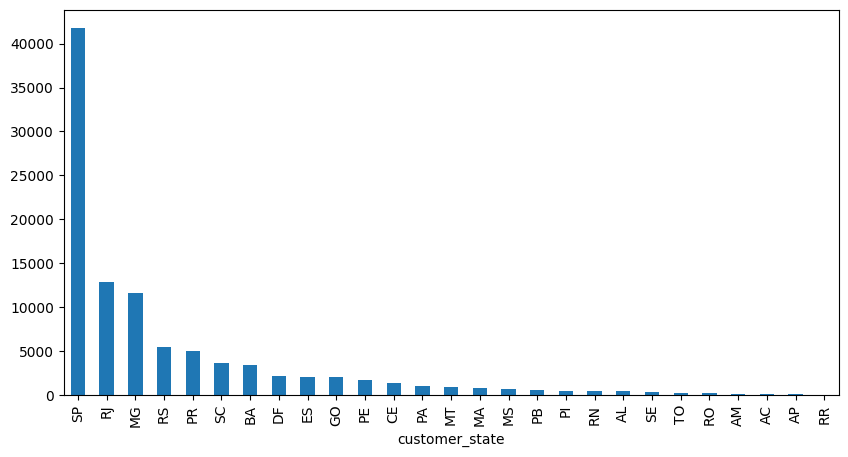

In [148]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

In [149]:
customer_id_with_order = order_df.customer_id.values

customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_with_order else "Non Active")

customers_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
84813,199257cd08aca6241fe13429b6e6604d,3288575b2fc685ccbb88e60ad095fb4b,23080,rio de janeiro,RJ,Active
25236,d3280ade77adc50bab8f303d92eebb17,c67aea5dba36ec8b8b9cd1c16e0fcee3,40415,salvador,BA,Active
18128,a820146409b46b535505aff7d58f3ffc,4577881f7a6c10d8eb6bd7f7a82ffa86,3510,sao paulo,SP,Active
69152,e139948a02a65f3d63dca4169cd990b8,6a9e15d6fa8ce1cabf193c21aa577f64,12600,lorena,SP,Active
74306,f80fc8c638c8616af8789ae5e751ff13,aef1ae2be9b88cd849660049539ac801,74843,goiania,GO,Active
76879,0d2ebe560b5e8a4dc417435cb090eccf,eb38c074669eb58932a0b741d89d591d,24340,niteroi,RJ,Active
23332,f2964656a77f6f0b5b0db9acce8a863a,a1f3ef4dca76be294190831edcd88433,8558,poa,SP,Active
80348,d407879de49d6ec3fd2d9e50b7419ce4,1540e8dc0dea37ea07ce8dba16b647f1,37928,sao roque de minas,MG,Active
57920,2814ddad2bdc3682d9f32b3f4c86dd7e,8a8a31d188c3cf9dea0126d1b1049c18,13400,piracicaba,SP,Active
55438,685986b14ecb5c1cab5adeb6d7ad89b8,c1d0cbc16303f3d4a3442589a692495a,13487,limeira,SP,Active


In [150]:
customers_df.groupby(by="status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

In [151]:
orderan_customer_df = pd.merge(
   left=customers_df, 
   right=order_df, 
   how='inner',
   right_on='customer_id',
   left_on='customer_id'
)
orderan_customer_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
89842,0a8c994d63dcee9298d895688ba3c358,977004bef657cbc05d84674e29568a15,6765,taboao da serra,SP,Active,c6985618e38b04aa3af0206c2c042aa5,delivered,2018-05-07 22:43:38,2018-05-07 22:55:12,2018-05-08 14:17:00,2018-05-09 18:42:03,2018-05-21
25284,81615092e749eba5998aafcbd72b3113,9ab9e6724cc65e59593099f18081fd35,35550,itapecerica,MG,Active,74a5900cf86c1ea72e09040bd744e793,delivered,2017-10-22 12:19:55,2017-10-22 12:35:21,2017-10-24 18:04:08,2017-11-01 15:57:48,2017-11-22
90690,9e1540e5915a50dba7073759d4efd583,c0509748921a2c0005ce9a3d854e450c,7130,guarulhos,SP,Active,319bc82f24defe9aea4274a6bded23ab,delivered,2017-11-18 16:27:57,2017-11-18 16:46:01,2017-11-21 13:46:55,2017-11-23 13:22:14,2017-12-01
48936,f4fe2dbe94714c74fce3fa1bd21b5e03,39104edef5e46d7b8c61848cc95e6d97,8694,suzano,SP,Active,a3bb82a765bf828134959a50bdc5f8cc,delivered,2017-09-28 10:32:57,2017-09-28 10:50:29,2017-09-29 19:28:57,2017-10-02 18:12:35,2017-10-16
56968,d61274989a1013559fec1e4a020eeb0c,9c5da89da1bac2267120ffb461ec86b9,2936,sao paulo,SP,Active,020aec76c43508e4214579c52c1133f4,delivered,2018-06-25 22:45:30,2018-06-26 00:33:21,2018-06-26 14:02:00,2018-07-02 19:47:49,2018-07-25
51171,afcd4050c3409ceef1d6fb4358e70014,11d952f7b426226c968e95da4f99783d,29101,vila velha,ES,Active,f757fc88a9be2d57259be12e45955e7f,delivered,2017-11-10 15:55:41,2017-11-10 16:15:27,2017-11-14 22:41:22,2017-11-21 19:34:45,2017-12-05
51709,efc66ff7da7b21de91828926c9a58fe1,dd7be927ce65354ff18a65c37e39c55d,39390,bocaiuva,MG,Active,f8d19a0283152c2a14277f39a74da971,delivered,2017-10-05 12:27:04,2017-10-05 12:49:21,2017-10-06 15:41:34,2017-10-13 16:38:06,2017-11-06
79086,126aa0762ee7cdedfaa704040e7d478f,d52feaaec9b2f7f2759acf9e5e525551,30840,belo horizonte,MG,Active,fcbe5b8ab9e476b1f5fc6862539d7a22,delivered,2018-03-22 10:31:05,2018-03-22 10:49:28,2018-03-23 21:14:36,2018-03-28 17:52:10,2018-04-10
80978,a751b57dd2b8363edf70ff739a358bd9,ef6cab3bac82818121ec4b57d6c9e88d,29175,serra,ES,Active,a9a4989d18319f417053642957c9da22,delivered,2017-05-20 16:24:16,2017-05-22 12:48:07,2017-05-30 12:17:18,2017-06-09 16:25:52,2017-07-20
50942,3df71cb6e2d4c4b0c0b83c0ef3e8f5b5,2f61db7165adffd5b88eead74e652221,32041,contagem,MG,Active,85eab7a4f0d59bd1eccd9fd217691aa6,delivered,2017-09-13 16:24:58,2017-09-14 16:30:22,2017-09-15 19:20:04,2017-09-21 16:19:03,2017-10-03


In [152]:
orderan_customer_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

In [153]:
orderan_customer_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [154]:
orderan_customer_df.groupby(by="order_status").order_id.nunique().sort_values(ascending=False).head(10)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

**Explore Data Orderan Berhasil (Pay & Review) Orderan**

In [155]:
order_success_df = pd.merge(
   left=order_payments_df, 
   right=order_reviews_df, 
   how='inner',
   right_on='order_id',
   left_on='order_id'
)

order_success_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
23708,519e5b17180d3ebefad6f7b8c1a6c7c6,1,boleto,1,149.64,756036c5fb41c2f4ed7ed8e290b768c2,1,no comment,O pedido realizado foi de 2 kits de pinceis e ...,2017-03-21,2017-03-22 14:09:22
55594,ebcb26a45847ef36be47894f2af9bfd7,1,credit_card,5,107.88,b7f988141d8e55534a98351036d705a8,5,no comment,Muito bom,2017-10-31,2017-11-02 15:14:02
62036,2e7ca2344bf0db90bba866fa90409cfd,1,credit_card,5,96.24,3c3af66071d04f16ca094ab723ed1b93,3,no comment,Nenhuma,2017-10-12,2017-10-14 16:19:57
79145,b35bc2322f1b11d08503450f158b9cfb,1,credit_card,1,110.32,98a0a7af6be809e95a35fff17d816044,4,no comment,no comment,2018-03-18,2018-03-20 10:40:53
1181,f1a873fc10e7bd542bcc4198baade2b9,1,credit_card,1,67.57,855579b176442a843855e24c8b391fda,4,Muito bom,Gostei do produto,2018-08-09,2018-08-10 00:38:42
57666,bc238a82710ad46b0977e570ab085926,1,credit_card,5,128.45,1a3b9e59d5713cb64101a5049b8c2735,5,no comment,no comment,2018-02-27,2018-02-28 09:32:35
26850,b0f595976cc8465db878685b2a613f5f,1,boleto,1,77.38,66bfd2a9055dabc43fe7cbabda6f1f54,3,no comment,no comment,2017-08-31,2017-08-31 21:06:22
70245,35c0409785e3654ba803189b2ded11d3,1,boleto,1,31.29,52a947a00c633e87a61e87ddc6e044c9,4,no comment,no comment,2018-04-24,2018-04-26 23:27:52
8865,c2be1e0558f4f2932216d9b9f668d987,1,boleto,1,42.07,70af07f8aec9508b555dec4508cfd8e0,5,no comment,no comment,2017-06-23,2017-06-27 17:55:56
88797,79f92b33bbe0c43264104fc5ee0b10b2,1,boleto,1,36.98,8643353366228abba19f76c08979a06e,4,no comment,no comment,2018-05-19,2018-05-23 00:33:09


In [156]:
order_success_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False).head(10)

payment_type
credit_card    75910
boleto         19636
voucher         3829
debit_card      1521
not_defined        3
Name: order_id, dtype: int64

In [157]:
order_success_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value":  ["min", "max"]
})

order_id payment_value          
              nunique           min       max
payment_type                                 
boleto          19636         11.62   7274.88
credit_card     75910          0.01  13664.08
debit_card       1521         13.38   4445.50
not_defined         3          0.00      0.00
voucher          3829          0.00   3184.34

In [158]:
order_success_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False).head(10)

review_score
5    57076
4    19098
1    11392
3     8160
2     3148
Name: order_id, dtype: int64

In [159]:
orderan_customer_df = pd.merge(
   left=orderan_customer_df, 
   right=order_success_df, 
   how='left',
   right_on='order_id',
   left_on='order_id'
)

**Explore Data Products**

In [160]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
11968,382132cf96c88a277a65226833af5f61,informatica_acessorios,49.0,664.0,3.0,680.0,47.0,7.0,18.0
23818,2713c4903e61c6917363eb4a8533c16a,informatica_acessorios,39.0,1442.0,2.0,1275.0,22.0,14.0,14.0
7279,575889c312f07612d39648ea61253cd5,telefonia,45.0,169.0,1.0,250.0,16.0,6.0,11.0
16351,696b2df83e0459ec8c60dfe72a77cf66,cama_mesa_banho,46.0,723.0,1.0,250.0,35.0,10.0,30.0
14271,d11945f4c91fe1cdf997b92559c7e4b1,fashion_bolsas_e_acessorios,50.0,1359.0,1.0,150.0,16.0,2.0,11.0
23332,aa175ef941b5ebc330e96ea4328488b8,esporte_lazer,53.0,831.0,1.0,800.0,16.0,2.0,11.0
23370,0141f5b2fc5389a8b247ae23b58482ef,relogios_presentes,57.0,486.0,6.0,240.0,16.0,11.0,12.0
4270,ff14b42e6c031d90825f40f2b1089185,papelaria,57.0,158.0,1.0,3474.0,31.0,28.0,30.0
8962,4ae6163553190ab2897ecd7683eaafe2,consoles_games,43.0,1490.0,1.0,350.0,20.0,10.0,20.0
32595,4bc67f0e0c4badffd66ddb6641122a33,relogios_presentes,59.0,179.0,2.0,200.0,16.0,2.0,11.0


In [161]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.150458,629.208849,1.720614,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [162]:
products_df['product_category_name'].nunique()

74

In [163]:
products_df['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 74, dtype: int64

In [164]:
product_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [165]:
product_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False).head(10)

product_category_name
cama_mesa_banho           3029
esporte_lazer             2867
moveis_decoracao          2657
beleza_saude              2444
utilidades_domesticas     2335
automotivo                1900
informatica_acessorios    1639
brinquedos                1411
relogios_presentes        1329
telefonia                 1134
Name: product_id, dtype: int64

**Explore Data Order**

In [166]:
merged_order_item = pd.merge(order_df, order_item_df, on='order_id')
merged_order_item_payment = pd.merge(merged_order_item, order_payments_df, on='order_id')
merged_order_item_payment_review = pd.merge(merged_order_item_payment, order_reviews_df, on='order_id')
merged_order_item_payment_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,no comment,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,1,boleto,1,141.46,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,aa4383b373c6aca5d8797843e5594415,...,1,credit_card,3,179.12,e73b67b67587f7644d5bd1a52deb1b01,5,no comment,no comment,2018-08-18,2018-08-22 19:07:58


In [167]:
merged_order_item_payment_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117329 non-null  object        
 1   customer_id                    117329 non-null  object        
 2   order_status                   117329 non-null  object        
 3   order_purchase_timestamp       117329 non-null  datetime64[ns]
 4   order_approved_at              117314 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116094 non-null  datetime64[ns]
 6   order_delivered_customer_date  114858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117329 non-null  datetime64[ns]
 8   order_item_id                  117329 non-null  int64         
 9   product_id                     117329 non-null  object        
 10  seller_id                      117329 non-null  object        
 11  

In [168]:
merged_order_item_payment_review.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,117329,117329,117329,117329,117314,116094,114858,117329,117329.000000,117329,...,117329.000000,117329,117329.000000,117329.000000,117329,117329.000000,117329,117329,117329,117329
unique,97916,97916,7,NaN,NaN,NaN,NaN,NaN,NaN,32789,...,NaN,4,NaN,NaN,97708,NaN,4498,35692,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,NaN,NaN,NaN,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,...,NaN,credit_card,NaN,NaN,eef5dbca8d37dfce6db7d7b16dd0525e,NaN,no comment,no comment,NaN,NaN
freq,63,63,114859,NaN,NaN,NaN,NaN,NaN,NaN,533,...,NaN,86520,NaN,NaN,63,NaN,103437,67650,NaN,NaN
mean,NaN,NaN,NaN,2017-12-30 10:29:39.749081856,2017-12-30 21:58:19.189721088,2018-01-03 12:09:47.466820096,2018-01-12 23:40:18.665604608,2018-01-23 07:08:36.977047552,1.194121,NaN,...,1.094452,NaN,2.940151,172.062565,NaN,4.031467,NaN,NaN,2018-01-11 23:57:07.684545280,2018-01-15 03:28:45.726342144
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,NaN,...,1.000000,NaN,0.000000,0.000000,NaN,1.000000,NaN,NaN,2016-10-15 00:00:00,2016-10-16 03:20:17
25%,NaN,NaN,NaN,2017-09-11 16:37:08,2017-09-12 04:35:32.500000,2017-09-14 20:27:55.249999872,2017-09-23 00:28:20.500000,2017-10-03 00:00:00,1.000000,NaN,...,1.000000,NaN,1.000000,60.750000,NaN,4.000000,NaN,NaN,2017-09-22 00:00:00,2017-09-25 23:24:55
50%,NaN,NaN,NaN,2018-01-18 09:42:57,2018-01-18 14:16:46,2018-01-23 18:50:08,2018-02-01 16:15:39.500000,2018-02-14 00:00:00,1.000000,NaN,...,1.000000,NaN,2.000000,108.100000,NaN,5.000000,NaN,NaN,2018-02-01 00:00:00,2018-02-03 23:11:32
75%,NaN,NaN,NaN,2018-05-03 19:53:54,2018-05-04 04:11:43.500000,2018-05-07 15:25:00,2018-05-15 14:03:23.500000,2018-05-25 00:00:00,1.000000,NaN,...,1.000000,NaN,4.000000,189.060000,NaN,5.000000,NaN,NaN,2018-05-15 00:00:00,2018-05-17 16:20:40
max,NaN,NaN,NaN,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,NaN,...,29.000000,NaN,24.000000,13664.080000,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


**Explore Penjualan Product**

In [169]:
item_sold_df = pd.merge(
    left=order_item_df,
    right=seller_df,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)

In [170]:
product_sell_df = pd.merge(
    left=product_df,
    right=item_sold_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)


In [171]:
product_sell_df.sort_values(by="price", ascending=False)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
20528,489ae2aa008f021502940f251d4cce7f,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0,housewares,0812eb902a67711a1cb742b3cdaa65ae,1,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,3635,sao paulo,SP
73922,69c590f7ffc7bf8db97190b6cb6ed62e,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0,computers,fefacc66af859508bf1a7934eab1e97f,1,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,86026,londrina,PR
49503,1bdf5e6731585cf01aa8169c7028d6ad,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0,art,f5136e38d1a14a4dbd87dff67da82701,1,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,74210,goiania,GO
71835,a6492cc69376c469ab6f61d8f44de961,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0,small_appliances,a96610ab360d42a2e5335a3998b4718a,1,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,13480,limeira,SP
32232,c3ed642d592594bb648ff4a04cee2747,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0,small_appliances,199af31afc78c699f0dbf71fb178d4d4,1,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,13480,limeira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55911,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,11,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
55903,05b515fdc76e888aada3c6d66c201dff,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0,health_beauty,8272b63d03f5f79c56e9e4120aec44ef,3,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,3813,sao paulo,SP
29610,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,c5bdd8ef3c0ec420232e668302179113,2,96804ea39d96eb908e7c3afdb671bb9e,2018-05-07 02:55:22,0.85,22.30,38950,ibia,MG
29608,8a3254bee785a526d548a81a9bc3c9be,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0,construction_tools_construction,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,38950,ibia,MG


In [172]:
product_sell_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  ["min", "max"]
})

order_id  price         
                               nunique    min      max
product_category_name_english                         
agro_industry_and_commerce         182  12.99  2990.00
air_conditioning                   253  10.90  1599.00
art                                202   3.50  6499.00
arts_and_craftmanship               23   9.80   289.49
audio                              350  14.90   598.99
...                                ...    ...      ...
stationery                        2311   2.29  1693.00
tablets_printing_image              79  14.90   889.99
telephony                         4199   5.00  2428.00
toys                              3886   4.90  1699.99
watches_gifts                     5624   8.99  3999.90

[71 rows x 3 columns]

**Explore Data Transaksi**

In [173]:
transaksi_df = pd.merge(
    left=orderan_customer_df,
    right=product_sell_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
transaksi_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status,order_id,order_status,order_purchase_timestamp,order_approved_at,...,product_width_cm,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,Active,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,...,31.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,Active,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,...,40.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,Active,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,...,17.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,Active,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,...,28.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,Active,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,...,35.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [174]:
transaksi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119107 entries, 0 to 119106
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119107 non-null  object        
 1   customer_unique_id             119107 non-null  object        
 2   customer_zip_code_prefix       119107 non-null  int64         
 3   customer_city                  119107 non-null  object        
 4   customer_state                 119107 non-null  object        
 5   status                         119107 non-null  object        
 6   order_id                       119107 non-null  object        
 7   order_status                   119107 non-null  object        
 8   order_purchase_timestamp       119107 non-null  datetime64[ns]
 9   order_approved_at              118930 non-null  datetime64[ns]
 10  order_delivered_carrier_date   117021 non-null  datetime64[ns]
 11  

In [215]:
transaksi_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "price": "sum",
    "freight_value": "sum"
})

price  freight_value
customer_city       product_category_name_english                       
abadia dos dourados books_general_interest          39.90          18.38
                    cool_stuff                     199.00          20.63
                    sports_leisure                 120.00          15.59
abadiania           small_appliances               949.99          75.53
abaete              baby                            65.00          17.70
...                                                   ...            ...
ze doca             food_drink                      65.00          38.00
                    garden_tools                    39.90          26.61
                    musical_instruments            359.00          49.04
                    sports_leisure                 149.90          38.60
zortea              computers_accessories           69.90          20.98

[25199 rows x 2 columns]

**Insight:**
- **Produk Terlaris**: Berdasarkan analisis data penjualan, kategori produk `cama_mesa_banho`, `beleza_saude`, dan `esporte_lazer` merupakan kategori produk yang paling banyak terjual. Hal ini terlihat dari jumlah transaksi dan total pendapatan yang dihasilkan oleh kategori-kategori tersebut.

- **Pendapatan Tahunan**: Pendapatan tahunan dari kategori produk `beleza_saude`, `cama_mesa_banho`, dan `esporte_lazer` menunjukkan tren peningkatan dari tahun 2016 hingga 2018. Kategori `beleza_saude` mengalami peningkatan pendapatan yang signifikan pada tahun 2018.

- **Review Produk**: Skor ulasan produk menunjukkan bahwa sebagian besar pelanggan memberikan ulasan positif dengan skor 5.0 dan 4.0. Namun, terdapat juga sejumlah ulasan dengan skor rendah (1.0), yang menunjukkan adanya ketidakpuasan pelanggan terhadap beberapa produk.

- **Kota dan Negara Bagian dengan Penjualan Tertinggi**: Kota `sao paulo` dan negara bagian `SP` (Sao Paulo) merupakan wilayah dengan jumlah transaksi dan pendapatan tertinggi. Hal ini menunjukkan bahwa wilayah tersebut memiliki pasar yang besar dan potensial untuk penjualan produk.

- **Metode Pembayaran**: Metode pembayaran yang paling banyak digunakan oleh pelanggan adalah `credit_card`, diikuti oleh `boleto` dan `debit_card`. Hal ini menunjukkan preferensi pelanggan dalam melakukan pembayaran.

- **Pengiriman dan Waktu Pengiriman**: Data menunjukkan bahwa sebagian besar pesanan berhasil dikirimkan tepat waktu. Namun, terdapat beberapa pesanan yang mengalami keterlambatan pengiriman, yang dapat mempengaruhi kepuasan pelanggan.

- **Produk dengan Kategori Tidak Diketahui**: Terdapat sejumlah produk dengan kategori `unknown`, yang perlu ditangani lebih lanjut untuk memastikan data produk yang lengkap dan akurat.

- **Penjualan Berdasarkan Kuartal**: Analisis penjualan berdasarkan kuartal menunjukkan bahwa kategori produk `cama_mesa_banho`, `beleza_saude`, dan `esporte_lazer` konsisten menjadi kategori terlaris di setiap kuartal dari tahun 2016 hingga 2018.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren produk yang diminati customer berdasarkan kategori produk?


In [216]:
transaksi_df['month_year'] = transaksi_df['order_purchase_timestamp'].dt.to_period('M')
monthly_transactions = transaksi_df.groupby(['month_year', 'product_category_name_english']).size().reset_index(name='total_transactions')
monthly_transactions

,month_year,product_category_name_english,total_transactions
0,2016-09,furniture_decor,2
1,2016-09,health_beauty,3
2,2016-09,telephony,1
3,2016-10,air_conditioning,10
4,2016-10,audio,2
...,...,...,...
1248,2018-08,stationery,172
1249,2018-08,telephony,289
1250,2018-08,toys,170
1251,2018-08,watches_gifts,428


In [217]:
monthly_transactions_pivot = monthly_transactions.pivot(index='month_year', columns='product_category_name_english', values='total_transactions')
monthly_transactions_pivot

product_category_name_english,agro_industry_and_commerce,air_conditioning,art,arts_and_craftmanship,audio,auto,baby,bed_bath_table,books_general_interest,books_imported,...,security_and_services,signaling_and_security,small_appliances,small_appliances_home_oven_and_coffee,sports_leisure,stationery,tablets_printing_image,telephony,toys,watches_gifts
month_year,,,,,,,,,,,,,,,,,,,,,
2016-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
2016-10,NaN,10.0,NaN,NaN,2.0,12.0,14.0,8.0,1.0,NaN,...,NaN,NaN,NaN,NaN,19.0,NaN,NaN,10.0,27.0,5.0
2016-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,3.0,4.0,NaN,NaN,NaN,34.0,41.0,51.0,2.0,NaN,...,1.0,NaN,6.0,NaN,91.0,14.0,NaN,26.0,44.0,11.0
2017-02,9.0,13.0,NaN,NaN,7.0,89.0,34.0,183.0,8.0,1.0,...,NaN,NaN,28.0,NaN,167.0,21.0,8.0,115.0,68.0,39.0
2017-03,2.0,18.0,7.0,NaN,14.0,88.0,48.0,323.0,25.0,NaN,...,NaN,1.0,33.0,NaN,215.0,62.0,5.0,177.0,104.0,82.0
2017-04,NaN,16.0,1.0,NaN,12.0,97.0,52.0,313.0,12.0,1.0,...,NaN,3.0,22.0,NaN,225.0,36.0,12.0,149.0,116.0,106.0
2017-05,4.0,8.0,8.0,1.0,17.0,135.0,114.0,429.0,20.0,NaN,...,NaN,4.0,18.0,NaN,328.0,71.0,7.0,229.0,205.0,142.0
2017-06,1.0,11.0,12.0,NaN,11.0,118.0,79.0,435.0,21.0,2.0,...,NaN,2.0,25.0,1.0,291.0,38.0,8.0,170.0,159.0,130.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\225079960.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


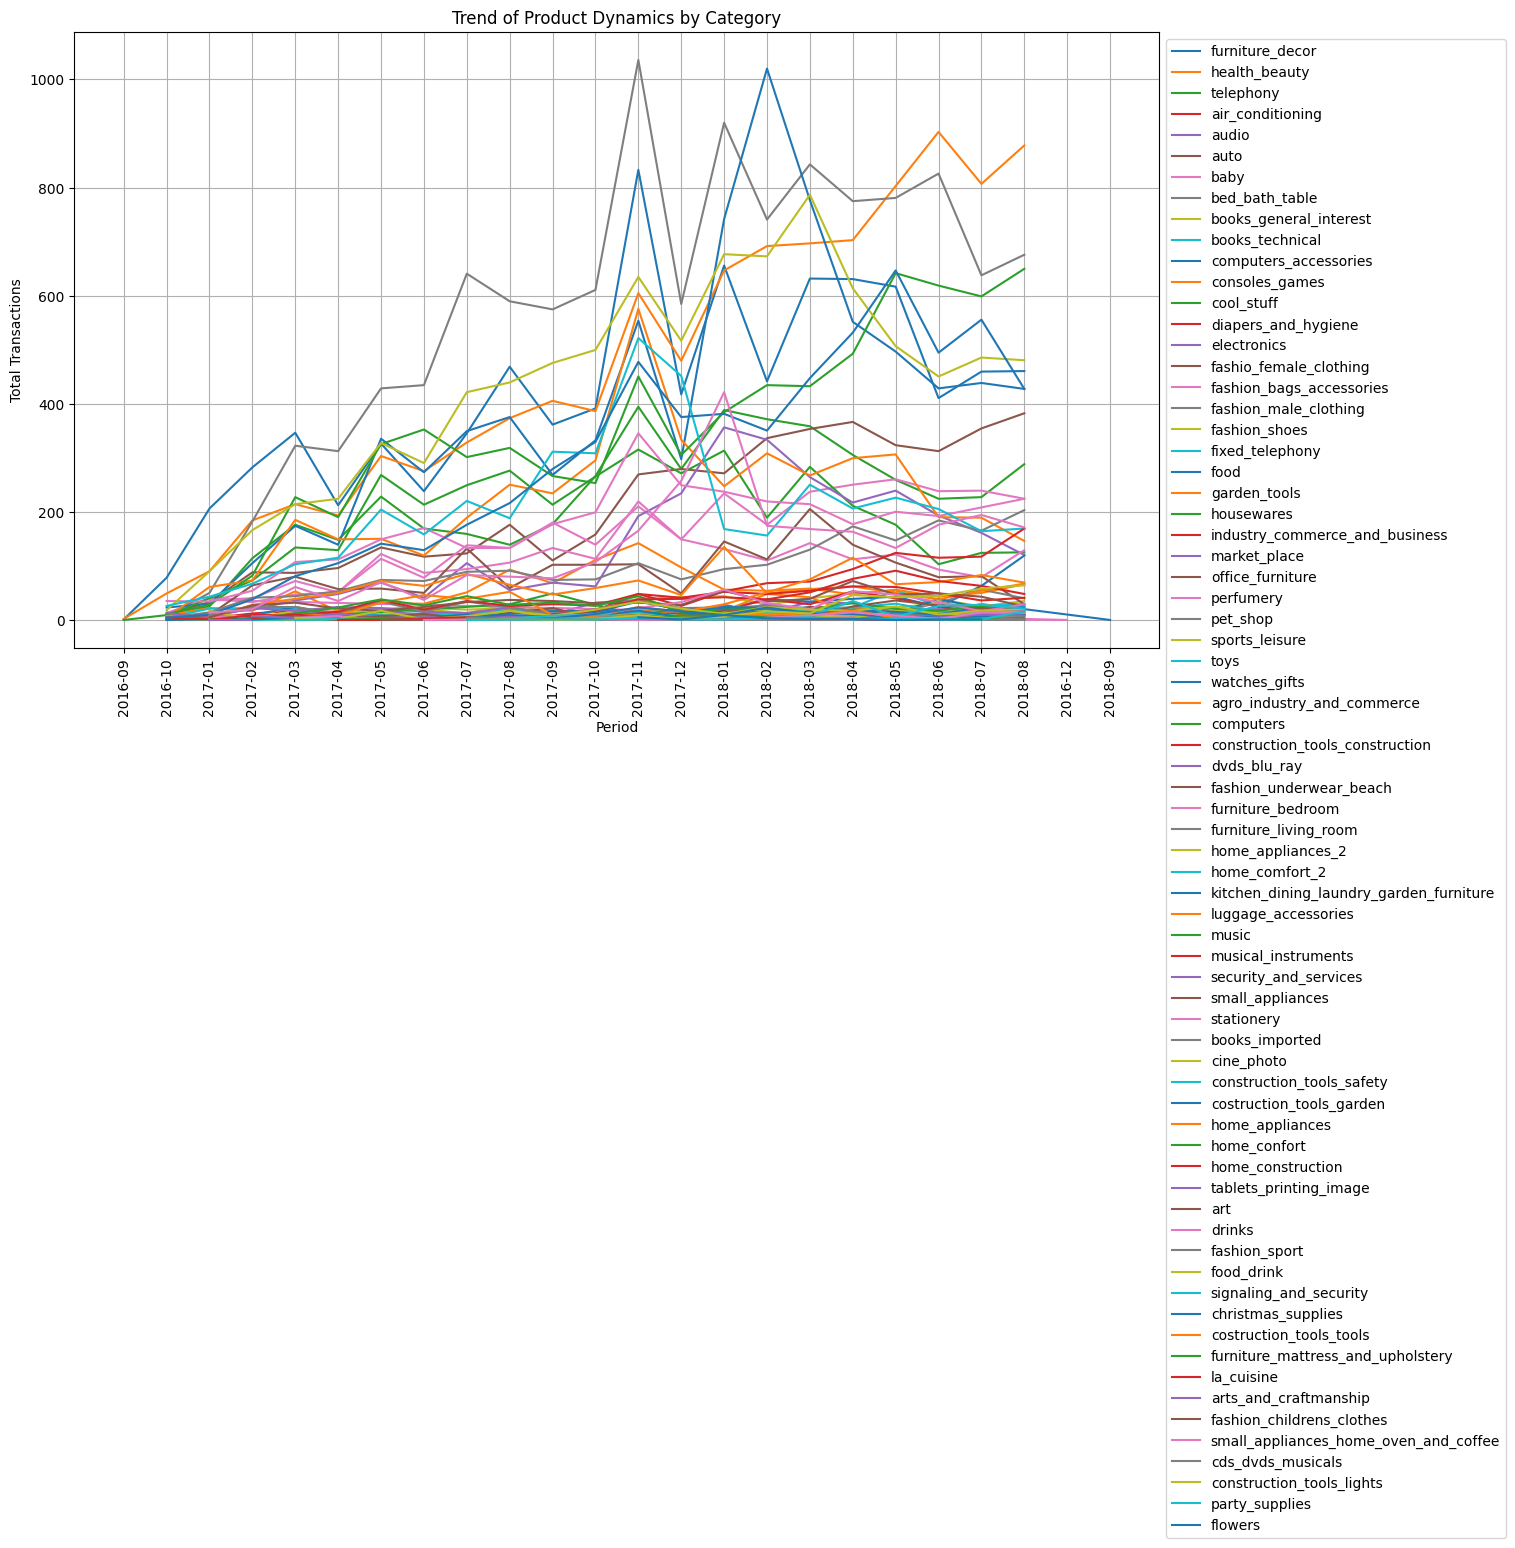

In [293]:
plt.figure(figsize=(14, 8))
for category in monthly_transactions['product_category_name_english'].unique():
   category_data = monthly_transactions[monthly_transactions['product_category_name_english'] == category]
   plt.plot(category_data['month_year'].astype(str), category_data['total_transactions'], label=category)

plt.title('Trend of Product Dynamics by Category')
plt.xlabel('Period')
plt.ylabel('Total Transactions')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

**Penjelasan :**
Visualisasi data sebenarnya menghasilkan informasi yang cocok untuk menjawab pertanyaan satu namun kurang tepat dikarenakan tidak bagus secara ekstetika. Sehingga disini saya ingin lebib mengecilkan visualisasinya dengan mengambil 3 kategori product teratas per quartil

In [220]:
transaksi_df['quarter_year'] = transaksi_df['order_purchase_timestamp'].dt.to_period('Q')

quarterly_transactions = transaksi_df.groupby(['quarter_year', 'product_category_name_english']).size().reset_index(name='total_transactions')

quarterly_transactions['rank'] = quarterly_transactions.groupby('quarter_year')['total_transactions'].rank(method='first', ascending=False)
top3_quarterly_transactions = quarterly_transactions[quarterly_transactions['rank'] <= 3]

top3_quarterly_transactions = top3_quarterly_transactions.sort_values(by=['quarter_year', 'rank']).reset_index(drop=True)
top3_quarterly_transactions

,quarter_year,product_category_name_english,total_transactions,rank
0,2016Q3,health_beauty,3,1.0
1,2016Q3,furniture_decor,2,2.0
2,2016Q3,telephony,1,3.0
3,2016Q4,furniture_decor,79,1.0
4,2016Q4,health_beauty,50,2.0
5,2016Q4,perfumery,36,3.0
6,2017Q1,furniture_decor,837,1.0
7,2017Q1,bed_bath_table,557,2.0
8,2017Q1,health_beauty,491,3.0
9,2017Q2,bed_bath_table,1177,1.0


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\796097681.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(quarter_labels)


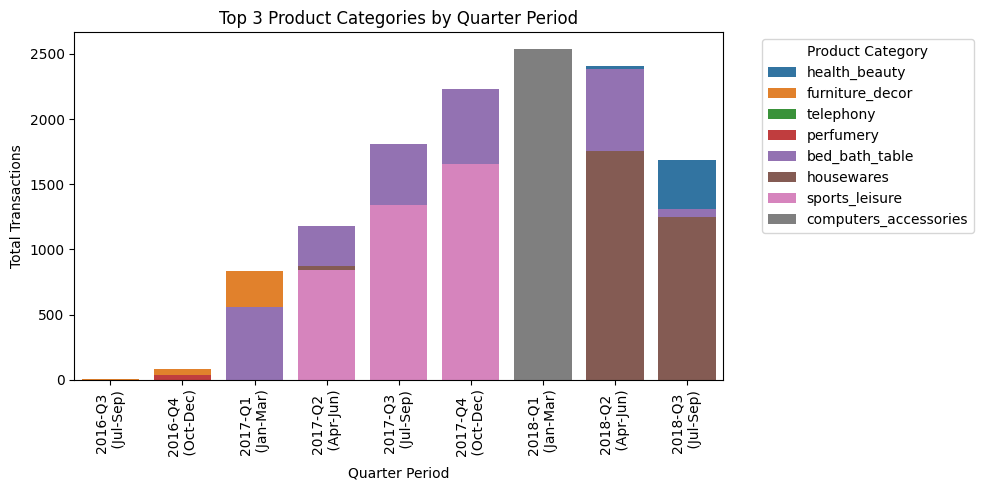

In [294]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top3_quarterly_transactions, x='quarter_year', y='total_transactions', hue='product_category_name_english', errorbar=None, dodge=False)

quarter_labels = [f"{str(label).replace('Q', '-Q')} \n ({label.start_time.strftime('%b')}-{label.end_time.strftime('%b')})" for label in top3_quarterly_transactions['quarter_year'].unique()]
plt.gca().set_xticklabels(quarter_labels)
plt.title('Top 3 Product Categories by Quarter Period')
plt.xlabel('Quarter Period')
plt.ylabel('Total Transactions')
plt.xticks(rotation=90)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Penjelasan** = Didapatkan Bar Chart dinamika tren produk per quartal yang mudah dipahami informasinya

### Pertanyaan 2: Apa saja produk terlaris dan sedikit terjual ?

In [222]:
jumlah_order_produk_df = transaksi_df.groupby("product_category_name_english")["product_id"].count().reset_index()
jumlah_order_produk_df = jumlah_order_produk_df.rename(columns={"product_id": "products"})
jumlah_order_produk_df = jumlah_order_produk_df.sort_values(by="products", ascending=False)
jumlah_order_produk_df = jumlah_order_produk_df.head(10)

jumlah_order_produk_df.head()

,product_category_name_english,products
7,bed_bath_table,11980
43,health_beauty,10029
65,sports_leisure,9002
39,furniture_decor,8827
15,computers_accessories,8150


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\928385172.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=jumlah_order_produk_df.head(5), palette=colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\928385172.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="products", y="product_category_name_english", data=jumlah_order_produk_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])


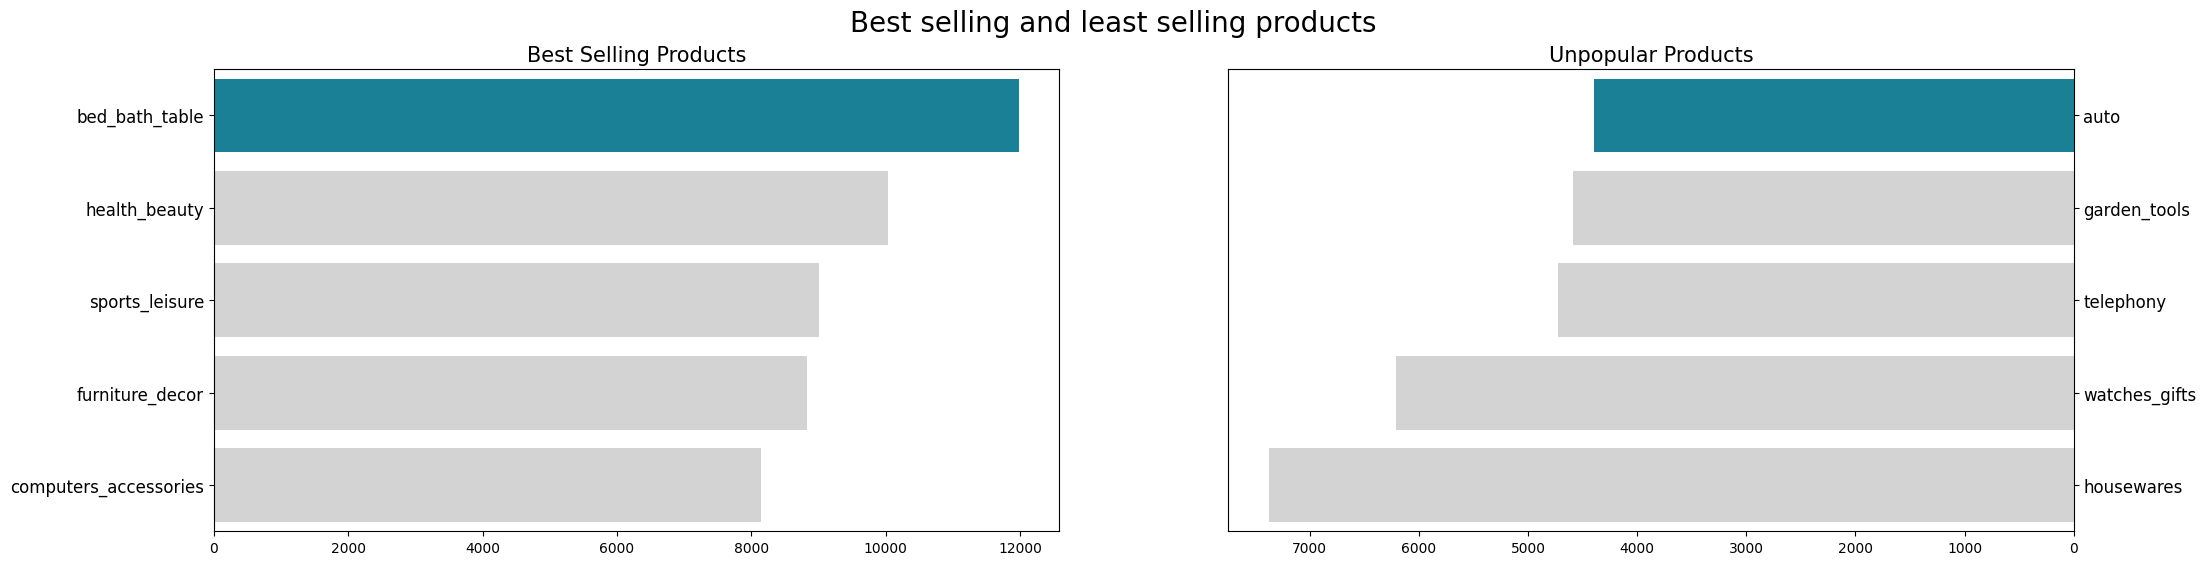

In [287]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#068DA9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="products", y="product_category_name_english", data=jumlah_order_produk_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling Products", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="products", y="product_category_name_english", data=jumlah_order_produk_df.sort_values(by="products", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Unpopular Products", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best selling and least selling products", fontsize=20)
plt.show()

### Pertanyaan 3: Berapa total pendapatan produk terlaris pertahun?

In [230]:
annual_revenue = transaksi_df.groupby([transaksi_df['quarter_year'], 'product_category_name_english'])['price'].sum().reset_index()

# ambil 5 kategori produk dengan produk terlaris
top5_product_categories = jumlah_order_produk_df['product_category_name_english'].head(5)

# Filter data berdasarkan 5 kategori produk terlaris
annual_revenue = annual_revenue[annual_revenue['product_category_name_english'].isin(top5_product_categories)].reset_index(drop=True)

# annual_revenue.rename(columns={
#          'order_purchase_timestamp': 'year'
#       }, inplace=True)


In [231]:
annual_revenue

,quarter_year,product_category_name_english,price
0,2016Q3,furniture_decor,72.89
1,2016Q3,health_beauty,134.97
2,2016Q4,bed_bath_table,478.99
3,2016Q4,computers_accessories,1573.22
4,2016Q4,furniture_decor,6521.87
5,2016Q4,health_beauty,4672.31
6,2016Q4,sports_leisure,3333.64
7,2017Q1,bed_bath_table,51100.52
8,2017Q1,computers_accessories,44561.23
9,2017Q1,furniture_decor,62570.43


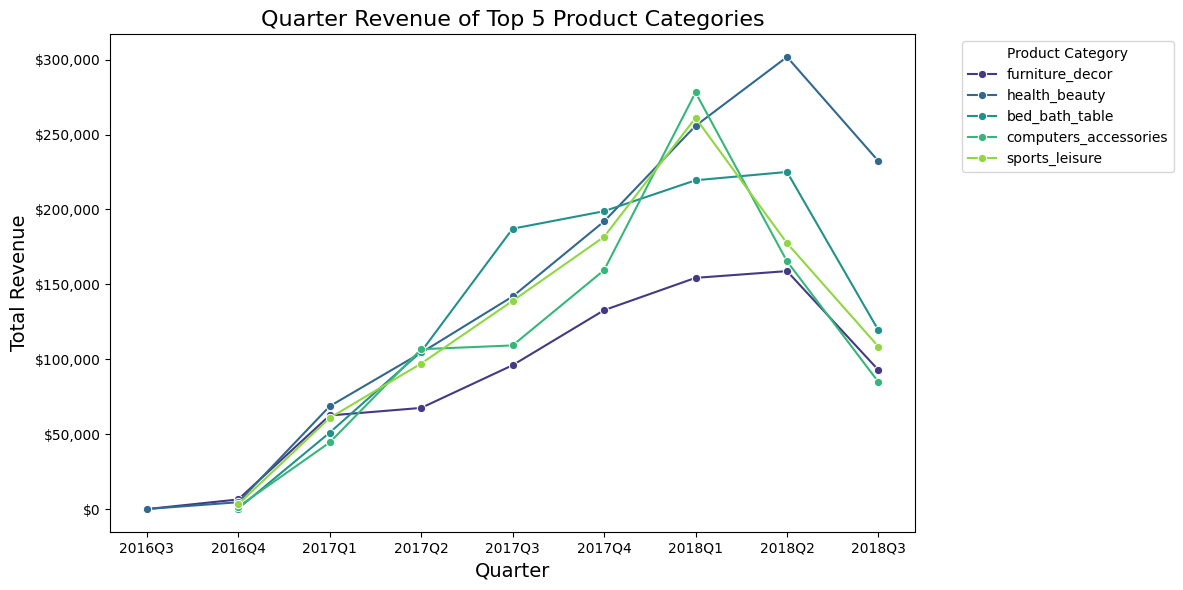

In [288]:
# Convert quarter_year to string
annual_revenue['quarter_year'] = annual_revenue['quarter_year'].astype(str)

# Create a line plot for the top 3 products by yearly revenue
plt.figure(figsize=(12, 6))
sns.lineplot(x='quarter_year', y='price', hue='product_category_name_english', data=annual_revenue, marker='o', palette='viridis')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Add titles and labels
plt.title('Quarter Revenue of Top 5 Product Categories', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Total Revenue', fontsize=14)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Format y-axis as dollar
formatter = ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
plt.gca().yaxis.set_major_formatter(formatter)


# Show the plot
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana tingkat kepuasan customer terhadap produk yang dijual?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\973494578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=transaksi_df, x='review_score', palette=["#068DA9"])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\973494578.py:3: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=transaksi_df, x='review_score', palette=["#068DA9"])


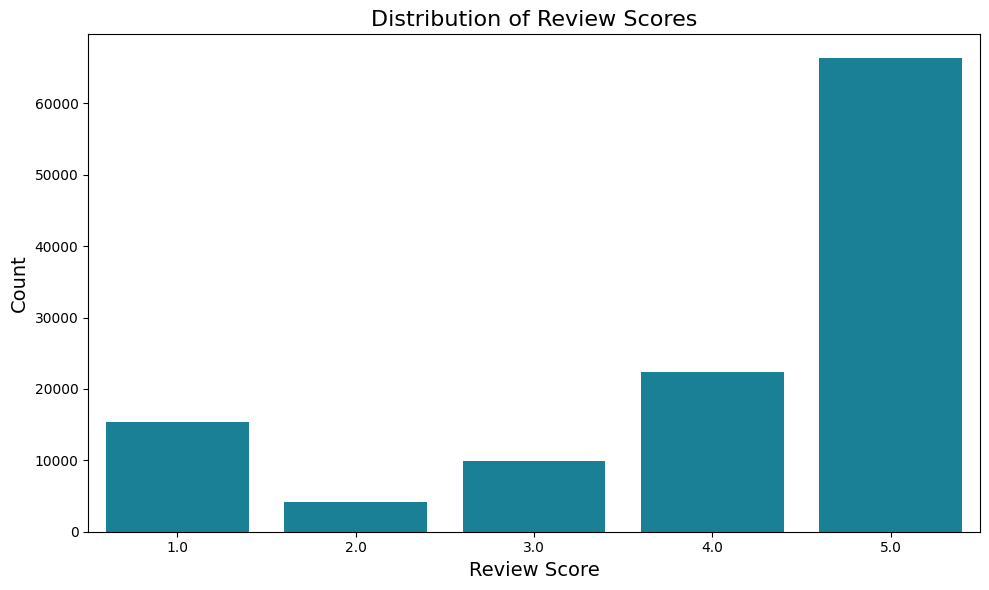

In [299]:
# Plot the distribution of review scores
plt.figure(figsize=(10, 6))
sns.countplot(data=transaksi_df, x='review_score', palette=["#068DA9"])

# Add titles and labels
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

**Insight:**
- Produk dengan kategori `bed_bath_table`, `health_beauty`, dan `sports_leisure` adalah tiga kategori produk teratas berdasarkan jumlah transaksi per kuartal.
- Produk dengan kategori `bed_bath_table` memiliki jumlah transaksi tertinggi pada kuartal tertentu, menunjukkan popularitas yang konsisten.
- Produk dengan kategori `health_beauty` dan `sports_leisure` juga menunjukkan tren yang kuat dalam jumlah transaksi per kuartal.
- Produk dengan kategori `bed_bath_table`, `health_beauty`, dan `sports_leisure` juga menghasilkan pendapatan tahunan tertinggi dari tahun 2016 hingga 2018.
- Kategori produk `health_beauty` menunjukkan peningkatan pendapatan yang signifikan dari tahun 2016 hingga 2018.
- Kategori produk `bed_bath_table` dan `sports_leisure` juga menunjukkan peningkatan pendapatan yang stabil selama periode yang sama.
- Distribusi skor ulasan menunjukkan bahwa sebagian besar pelanggan memberikan skor ulasan yang tinggi (4 dan 5), menunjukkan tingkat kepuasan pelanggan yang baik terhadap produk yang dijual.


## Analisis Lanjutan (Opsional)

In [236]:
import datetime as dt

# Tentukan tanggal referensi untuk menghitung recency
reference_date = transaksi_df['order_purchase_timestamp'].max() + dt.timedelta(days=1)

# Hitung nilai RFM
rfm_df = transaksi_df.groupby('customer_id').agg({
   'order_purchase_timestamp': lambda x: (reference_date - x.max()).days,
   'order_id': 'nunique',
   'payment_value': 'sum'
}).reset_index()

# Ganti nama kolom
rfm_df.columns = ['customer_id', 'recency', 'frequency', 'monetary']

# Tampilkan hasil
rfm_df.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,338,1,114.74
1,000161a058600d5901f007fab4c27140,459,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,597,1,195.42
3,0002414f95344307404f0ace7a26f1d5,428,1,179.35
4,000379cdec625522490c315e70c7a9fb,199,1,107.01


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\888216950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\888216950.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27112\888216950.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False`

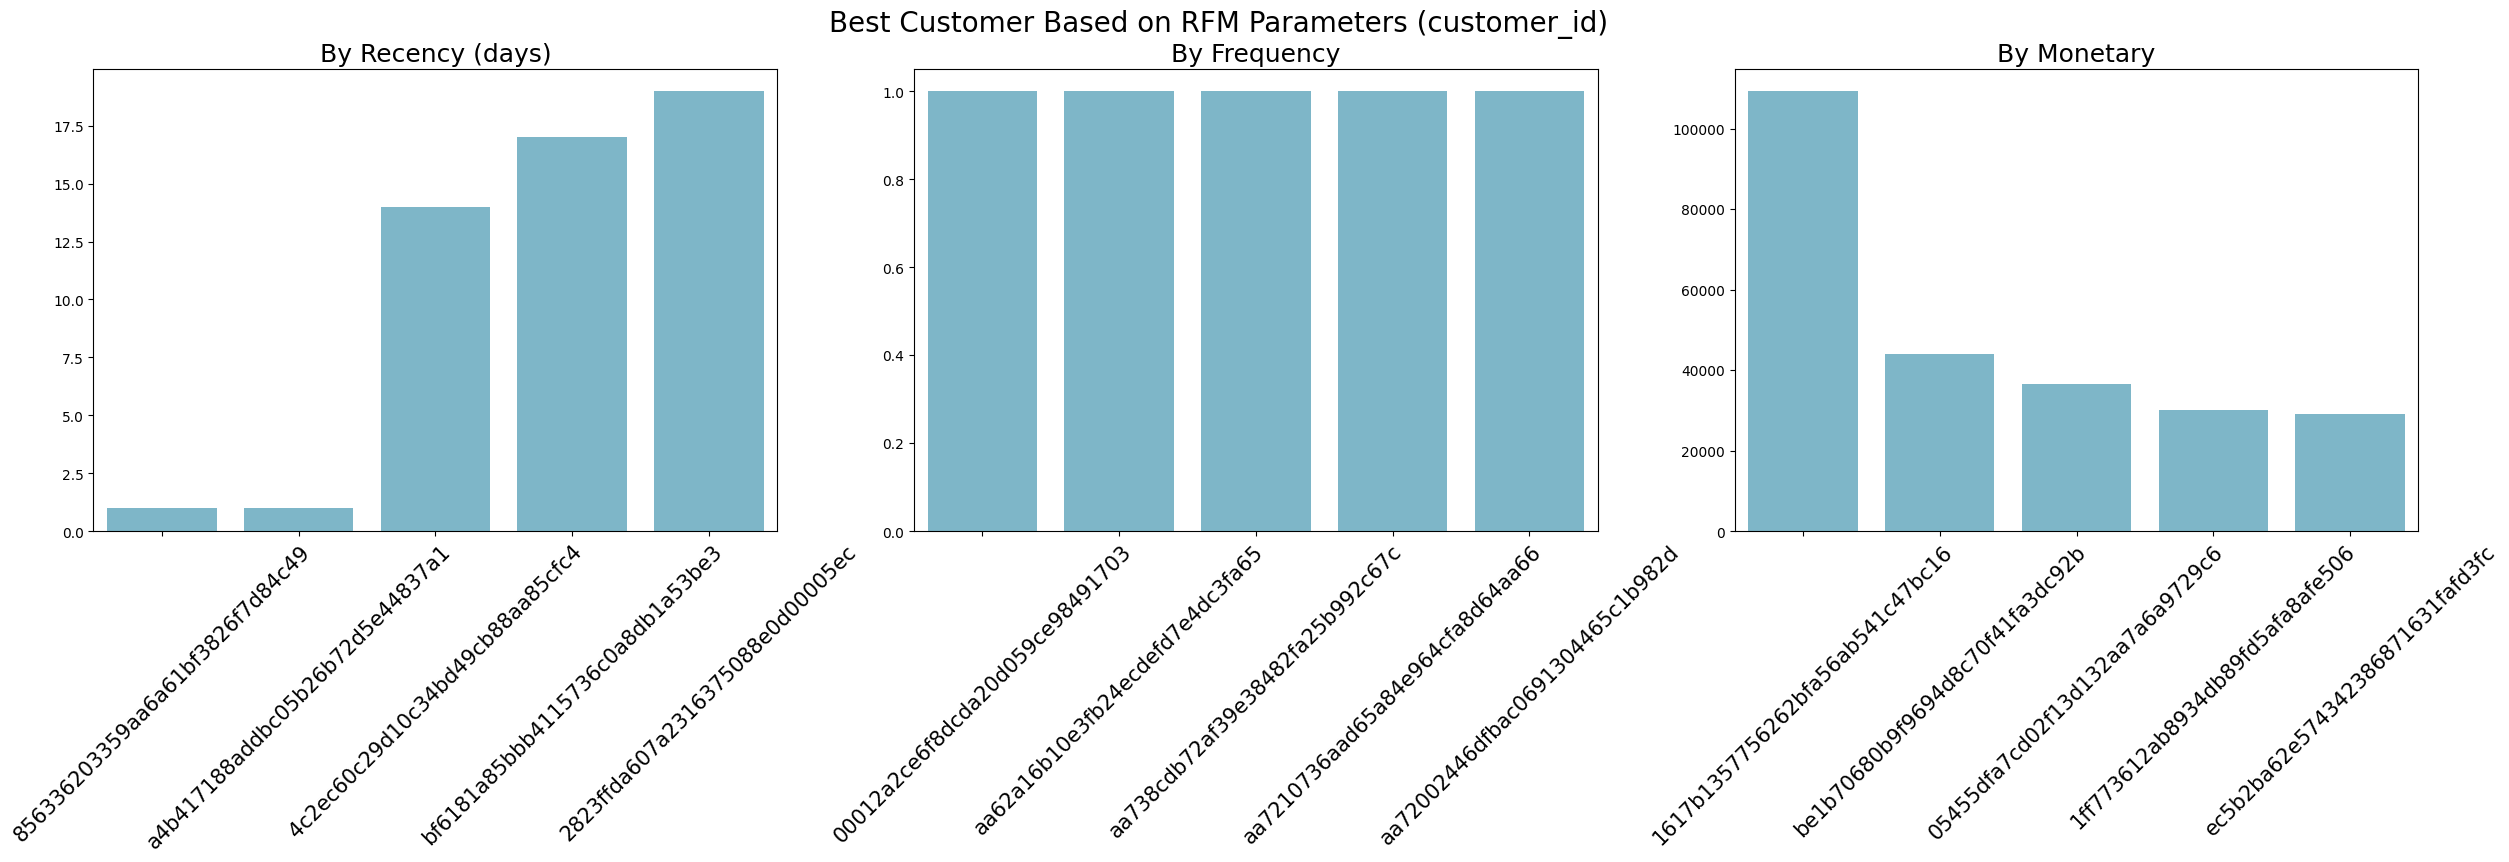

In [237]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
ax[0].xaxis.set_tick_params(rotation=45)


sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].xaxis.set_tick_params(rotation=45)


sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].xaxis.set_tick_params(rotation=45)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Conclusion pertanyaan 1:
   - Berdasarkan analisis tren dinamika produk yang diminati customer berdasarkan kategori produk, ditemukan bahwa kategori produk `bed_bath_table`, `health_beauty`, dan `sports_leisure` konsisten menjadi kategori teratas dalam jumlah transaksi per kuartal dari tahun 2016 hingga 2018.
   - Kategori `bed_bath_table` menunjukkan peningkatan yang signifikan dalam jumlah transaksi, terutama pada kuartal kedua dan ketiga tahun 2017.
   - Kategori `health_beauty` dan `sports_leisure` juga menunjukkan tren yang kuat dalam jumlah transaksi, dengan peningkatan yang stabil dari tahun 2016 hingga 2018.
   - Secara keseluruhan, ketiga kategori produk ini menunjukkan popularitas yang tinggi dan konsisten di antara pelanggan selama periode analisis.
  
- Conclusion pertanyaan 2:
   - Berdasarkan analisis produk terlaris dan sedikit terjual, ditemukan bahwa kategori produk `bed_bath_table`, `health_beauty`, dan `sports_leisure` merupakan kategori produk yang paling banyak terjual.
   - Kategori `bed_bath_table` memiliki jumlah transaksi tertinggi, diikuti oleh kategori `health_beauty` dan `sports_leisure`.
   - Produk dengan kategori `bed_bath_table` menunjukkan popularitas yang tinggi di antara pelanggan.
   - Sebaliknya, kategori produk yang sedikit terjual termasuk `auto`, `garden_tools`, dan `telephony`.
   - Kategori `automotive` memiliki jumlah transaksi terendah, menunjukkan bahwa produk dalam kategori ini kurang diminati oleh pelanggan.

- Conclusion pertanyaan 3:
   - Berdasarkan analisis total pendapatan tiga produk terlaris per tahun, ditemukan bahwa kategori produk `health_beauty`, `bed_bath_table`, dan `sports_leisure` merupakan kategori produk dengan pendapatan tertinggi dari tahun 2016 hingga 2018.
   - Kategori `health_beauty` menunjukkan peningkatan pendapatan yang signifikan setiap tahunnya, dengan pendapatan tertinggi pada tahun 2018.
   - Kategori `bed_bath_table` juga menunjukkan peningkatan pendapatan yang stabil, dengan pendapatan tertinggi pada tahun 2017.
   - Kategori `sports_leisure` menunjukkan peningkatan pendapatan yang konsisten, dengan pendapatan tertinggi pada tahun 2018.
   - Secara keseluruhan, ketiga kategori produk ini menunjukkan performa penjualan yang sangat baik dan berkontribusi signifikan terhadap total pendapatan.
  
- Conclusion pertanyaan 4:
   - Berdasarkan analisis tingkat kepuasan customer terhadap produk yang dijual, ditemukan bahwa sebagian besar pelanggan memberikan skor ulasan yang tinggi (4 dan 5).
   - Skor ulasan 5 merupakan skor yang paling banyak diberikan oleh pelanggan, menunjukkan tingkat kepuasan yang sangat baik terhadap produk yang dijual.
   - Skor ulasan 4 juga cukup banyak diberikan, menunjukkan bahwa banyak pelanggan yang merasa puas dengan produk yang mereka beli.
   - Namun, terdapat juga sejumlah ulasan dengan skor rendah (1), yang menunjukkan adanya ketidakpuasan pelanggan terhadap beberapa produk.
   - Secara keseluruhan, tingkat kepuasan pelanggan terhadap produk yang dijual cukup tinggi, dengan mayoritas ulasan berada pada skor 4 dan 5.

### Simpan Dataset

In [238]:
transaksi_df.to_csv('dashboard/main_data.csv', index=False)